# Introduction

## Teguh Samudra, Siddharth Maheshwari

This project is based on a Kaggle Competition [Titanic Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

# Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Data Preparation

In [2]:
raw_data = pd.read_csv('datasets/train.csv')

In [3]:
raw_data.shape

(891, 12)

In [4]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There are 12 columns in the dataset, and our response variable is the column, **Survived**.
-	**PassengerId**: ID to distinguish between passengers
-	**Survived**:  0 - passenger did not survive the titanic mishap, 1 - passenger survived
-	**Pclass**: Ticket class
-	**Name**: Name of the passenger
-	**Sex**: gender
-	**Age**: Age of the passenger
-	**SibSp**: # of siblings/spouse aboard the ship
-	**Parch**: # of parents/children aboard the ship
-	**Ticket**: Ticket number
-	**Fare**: Fare paid for the cruise
-	**Cabin**: Cabin Number
-	**Embarked**: Port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
# Data summary
raw_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Greenberg, Mr. Samuel",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Cabin column has only about 1/4 of the rows that is non-null value. This column would not be usefull 

* Name is also not a usefull to predict survival.

* Ticket number is not a useful indicator. Instead, we will use Pclass to determine the passenger's class

* Age has some missing values and we will remove these rows from the analysis. 


In [9]:
# Fill all NA values with blank
raw_data.fillna("", inplace=True)

In [11]:
# Remove the 2 rows without detail of the place of embarkment
titanic = raw_data[raw_data['Embarked'] != ""]
titanic.shape

(889, 12)

We think columns *Age* and *Cabin* are useful, but there are lot of null values in both these columns. We thus need to find a way to tackle the null values. 

- For *Age* we can try a combination of the gender and the person's title (Master, Mr, Ms, Mrs). We could also try it with a combination of SibSp and Parch

- For *Cabin* we need only the cabin type the person has. Therefore, we will extract the cabin type i.e. first letter of the entry. Then to counter the missing values, we can first try looking at all people with the same ticket number and give them the same cabin type. If blanks still exist, we can look at a combination of fare and embarkement point. For people who have their cabin type available in the data we can extract the different ranges of fare for different cabin types based on the embarkment point. Then, using this information we predict the cabin type of the rest of the people.

## Treating Age

## Remove Unnecessary Columns

In [6]:
titanic = raw_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1).dropna(axis = 0, how = 'any')
titanic.shape

(712, 8)

# Exploratory Data Analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Distribution of Data

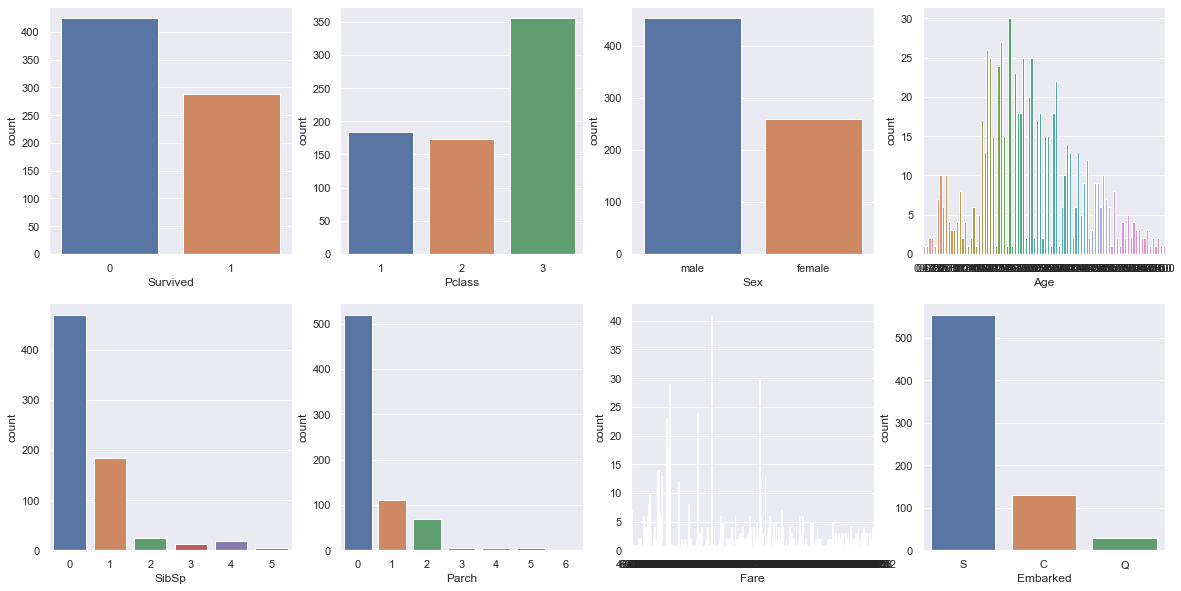

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for index, column in enumerate(titanic.columns):
    sns.countplot(titanic[column], ax = axes[index//4, index%4])

# Preprocessing for Machine Learning Algorithm

## Splitting Features and Target

In [9]:
from sklearn.feature_selection import train_test_split

feature_full = titanic.drop(columns=['Survived'])
target_full = titanic[['Survived']]

feature_train, feature_test, target_train, target_test = train_test_split(feature_full,
                                                                          target_full,
                                                                          test_size = 0.2, 
                                                                          random_state = 42)

ImportError: cannot import name 'train_test_split' from 'sklearn.feature_selection' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/__init__.py)

## Create a transformer to scale and dummify

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numeric_features = ['Age', 'Fare']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numeric_features),
        ('ohe', OneHotEncoder(drop = 'first'), categorical_features)
    ]
)


processed_array = preprocessor.fit_transform(feature_train).toarray()
colnames_dummified = preprocessor.named_transformers_['ohe'].get_feature_names(categorical_features)

## Transform training and testing feature

In [ ]:
feature_train = pd.DataFrame(processed_array,
                            index = feature_train.index,
                            columns = numeric_features+list(colnames_dummified))

feature_test = pd.DataFrame(preprocessor.transform(feature_test).toarray(), 
                            index = feature_test.index, 
                            columns = feature_train.columns)

## Check Correlation

In [ ]:
sns.heatmap(feature_train.corr(), square=True, cmap='RdYlGn')

# Algorithm selection

## Create Pipeline

In [ ]:
# Pipeline 
from sklearn.pipeline import Pipeline


from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV, cross_validate

# Algorithm to try
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipe = Pipeline(
    [
        #('selector', SelectKBest(chi2, k = 5)),
        ('classifier', LogisticRegression(solver = 'lbfgs'))
    ]
)

In [ ]:
search_space = [
    #{'selector__k' : [5, 10, 20, 100]},
    {'classifier': [LogisticRegression(solver = 'lbfgs')], 'classifier__C' : [0.01, 0.1, 1, 10]},
    {'classifier': [RandomForestClassifier()], 
     'classifier__max_depth': [1,5,10,15,30,50,70,100], 
     'classifier__criterion' : ['gini', 'entropy']},
    {'classifier': [KNeighborsClassifier()], 'classifier__n_neighbors': [1,5,10,15,30,50,70,100]}
]

In [ ]:
clf = GridSearchCV(pipe, search_space, 
                   cv = 5, 
                   verbose = 0)

best_model = clf.fit(feature_train, 
                     target_train.values.ravel())

#https://stackoverflow.com/questions/34274598/does-gridsearchcv-store-all-the-scores-for-all-parameter-combinations

best_model.best_params_

In [ ]:
best_model.best_score_